# Regression with Neural Networks in PyTorch
Neural networks are sometimes described as a ‘universal function approximator’. Here I show a few examples of simple and slightly more complex networks learning to approximate their target distributions.
The first distribution of data points we will look at is a simple sinus function with some random noise.

In [4]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data

import matplotlib.pyplot as plt

import numpy as np
import imageio

%matplotlib inline

## 1. Dataset
This part creates toy dataset.

In [12]:
from torch.utils.data import Dataset, DataLoader

class Dataset(Dataset):
    def __init__(self):
        self.x = torch.arange(-10, 10, 0.1).view(-1, 1)
        self.y = torch.sin(self.x)
        self.len = self.x.shape[0]

    def __getitem__(self, index):
        sample = self.x[index], self.y[index]
        return sample

    def __len__(self):
        return self.len

dataset = Dataset()


## 2. First Look
This part show the respresentation of the data.

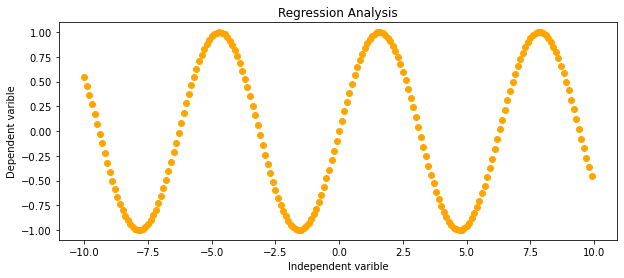

In [13]:
def initial_plotter(dataset):
    plt.figure(figsize=(10,4))
    plt.scatter(dataset.x.data.numpy(), dataset.y.data.numpy(), color = "orange")
    plt.title('Regression Analysis')
    plt.xlabel('Independent varible')
    plt.ylabel('Dependent varible')
    plt.show()

initial_plotter(dataset)

## 3. Modeling
This part designs the deep neural network.

In [15]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

In [16]:
model = Net(n_feature=1, n_hidden=10, n_output=1)     # define the network
# print(net)  # net architecture
optimizer = torch.optim.SGD(model.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss
train_loader = DataLoader(dataset=dataset, batch_size=1)

my_images = []
fig, ax = plt.subplots(figsize=(12,7))

# train the network
for t in range(200):
    for x, y in train_loader:
  
        prediction = net(x)     # input x and predict based on x

        loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

        optimizer.zero_grad()   # clear gradients for next train
        loss.backward()         # backpropagation, compute gradients
        optimizer.step()        # apply gradients
    
        # plot and show learning process
        plt.cla()
ax.set_title('Regression Analysis', fontsize=35)
ax.set_xlabel('Independent variable', fontsize=24)
ax.set_ylabel('Dependent variable', fontsize=24)
ax.set_xlim(-1.05, 1.5)
ax.set_ylim(-0.25, 1.25)
ax.scatter(x.data.numpy(), y.data.numpy(), color = "orange")
ax.plot(x.data.numpy(), prediction.data.numpy(), 'g-', lw=3)
ax.text(1.0, 0.1, 'Step = %d' % t, fontdict={'size': 24, 'color':  'red'})
ax.text(1.0, 0, 'Loss = %.4f' % loss.data.numpy(),
fontdict={'size': 24, 'color':  'red'})

    # Used to return the plot as an image array 
    # (https://ndres.me/post/matplotlib-animated-gifs-easily/)
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    my_images.append(image)
    
   


# save images as a gif    
imageio.mimsave('./curve_1.gif', my_images, fps=10)

NameError: name 'x' is not defined